In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.optimize as opt
from scipy.optimize import curve_fit
import os
import re


In [55]:
def powerlaw(t,K,n,Af,tau):
    return Af*(1-np.exp(-K*np.power(t+tau,n)/Af))#/Af))


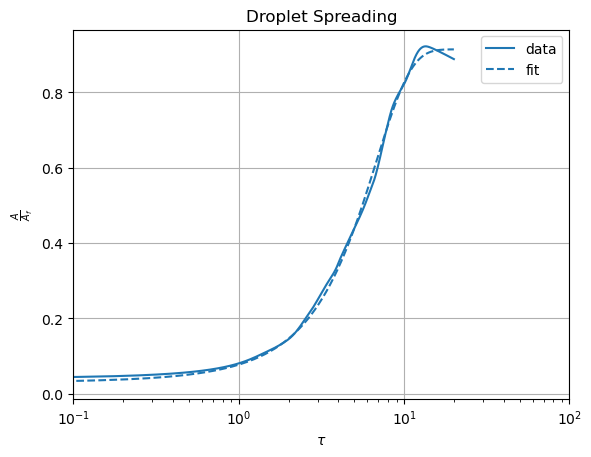

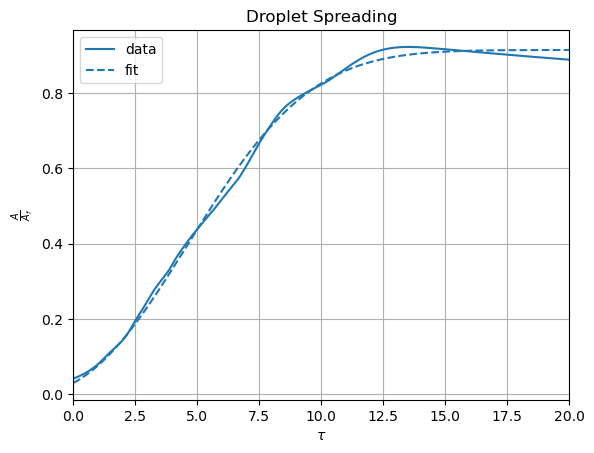

In [56]:
fit_param=np.zeros([1,4])

temp=pd.read_csv('./monitor/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
    # === Plot Data === #
xdata=data['Time'].to_numpy()
ydata=data['WetAreaFract'].to_numpy()

ydata=ydata
p=plt.semilogx(xdata,ydata,label='data')
    # === Fit model === #
    #popt, pcov = curve_fit(powerlaw, data['Time'], np.pi*np.power(data['Wetted'],2),[1,0.5,1,8])
popt, pcov = curve_fit(powerlaw, xdata, ydata,bounds=(10**-3,[10,10,10,2]))
fit_param[0,:]=popt
p=plt.semilogx(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')


#plt.ylim([0,1.2])
plt.xlim([1e-1,1e2])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{A}{A_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()

s=plt.plot(xdata,ydata,label='data')
s=plt.plot(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')

#plt.ylim([0,1.2])
plt.xlim([0,20])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{A}{A_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()

plt.show()
    

In [52]:
#K,n,A_f,tau
fit_param

array([[0.00740947, 2.24661405, 0.94352575, 2.        ]])

In [53]:
data

,Timestep,Time,VOF,VOF.1,Total,Drop,WetAreaFract,VoF,EQ_Area,CL,CA,CA.1,C,alpha
1,0.0,0.000000,1.0,0.0,4.18828,1.954870,0.042289,0.088822,9.03543,0.000000,2.468190,141.417007,0.042289,0.000000
2,1.0,0.035280,1.0,0.0,4.18952,1.955280,0.043039,0.089372,9.03543,0.021253,2.463440,141.145004,0.045621,0.017421
3,2.0,0.070559,1.0,0.0,4.19087,1.955800,0.043914,0.090004,9.03543,0.024812,2.457830,140.822998,0.048810,0.039866
4,3.0,0.105838,1.0,0.0,4.19221,1.956330,0.044838,0.090669,9.03543,0.026193,2.451900,140.483002,0.051518,0.061828
5,4.0,0.141118,1.0,0.0,4.19356,1.956850,0.045804,0.091366,9.03543,0.027377,2.445740,140.130005,0.054030,0.084347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,422.0,14.887900,1.0,0.0,4.18265,0.919330,0.916067,0.806034,9.03543,-0.005638,0.893131,51.172600,1.173270,-0.091633
424,423.0,14.923200,1.0,0.0,4.18241,0.919455,0.915868,0.805872,9.03543,-0.005640,0.893244,51.179100,1.174130,-0.091905
425,424.0,14.958500,1.0,0.0,4.18216,0.919580,0.915668,0.805709,9.03543,-0.005661,0.893358,51.185600,1.175970,-0.092484
426,425.0,14.993800,1.0,0.0,4.18192,0.919706,0.915468,0.805546,9.03543,-0.005681,0.893472,51.192200,1.177740,-0.093038


In [43]:
temp

,Timestep,Time,VOF,VOF.1,Total,Drop,WetAreaFract,VoF,EQ_Area,CL,CA,CA.1,C,alpha
0,number,maximum,minimum,volume,height,radius,vel,rad,deg,NaN,NaN,NaN,NaN,NaN
1,0,0.00000E+00,1.00000E+00,0.00000E+00,4.18828E+00,1.95487E+00,3.82102E-01,8.02547E-01,9.03543E+00,0.000000,2.468190,141.4170,0.382102,0.000000
2,1,3.52795E-02,1.00000E+00,0.00000E+00,4.18952E+00,1.95528E+00,3.88876E-01,8.07511E-01,9.03543E+00,0.192030,2.463440,141.1450,0.412207,0.017421
3,2,7.05590E-02,1.00000E+00,0.00000E+00,4.19087E+00,1.95580E+00,3.96785E-01,8.13222E-01,9.03543E+00,0.224185,2.457830,140.8230,0.441021,0.039866
4,3,1.05838E-01,1.00000E+00,0.00000E+00,4.19221E+00,1.95633E+00,4.05135E-01,8.19230E-01,9.03543E+00,0.236667,2.451900,140.4830,0.465483,0.061828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,422,1.48879E+01,1.00000E+00,0.00000E+00,4.18265E+00,9.19330E-01,8.27706E+00,7.28286E+00,9.03543E+00,-0.050944,0.893131,51.1726,10.601000,-0.091633
424,423,1.49232E+01,1.00000E+00,0.00000E+00,4.18241E+00,9.19455E-01,8.27526E+00,7.28140E+00,9.03543E+00,-0.050964,0.893244,51.1791,10.608800,-0.091905
425,424,1.49585E+01,1.00000E+00,0.00000E+00,4.18216E+00,9.19580E-01,8.27346E+00,7.27993E+00,9.03543E+00,-0.051153,0.893358,51.1856,10.625400,-0.092484
426,425,1.49938E+01,1.00000E+00,0.00000E+00,4.18192E+00,9.19706E-01,8.27165E+00,7.27846E+00,9.03543E+00,-0.051326,0.893472,51.1922,10.641300,-0.093038
